<a href="https://colab.research.google.com/github/VeraKutyavina/ml-tasks/blob/main/iris_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

In [123]:
iris_dataset = datasets.load_iris()

iris = pd.DataFrame(
    data= np.c_[iris_dataset['data'], iris_dataset['target']],
    columns= iris_dataset['feature_names'] + ['target']
    )

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [124]:
#проверим что нет пустых значений 

iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [125]:
# нормализация данных

def normalize_column(initial_data):
  data = np.copy(initial_data)
  min =  data.min()
  max = data.max()
  for i in range(len(data)):
    data[i] = (data[i] - min) / (max - min)
  return data

def normalize_dataset(data):
  normal = np.stack([
      normalize_column(data.iloc[:,0]), 
      normalize_column(data.iloc[:,1]), 
      normalize_column(data.iloc[:,2]), 
      normalize_column(data.iloc[:,3]),
      data.iloc[:,4]
      ])
  return pd.DataFrame(normal.transpose(), columns=iris.columns)  

In [126]:
normal_iris = normalize_dataset(iris) 
normal_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,0.666667,0.416667,0.711864,0.916667,2.0
146,0.555556,0.208333,0.677966,0.750000,2.0
147,0.611111,0.416667,0.711864,0.791667,2.0
148,0.527778,0.583333,0.745763,0.916667,2.0
149,0.444444,0.416667,0.694915,0.708333,2.0


Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

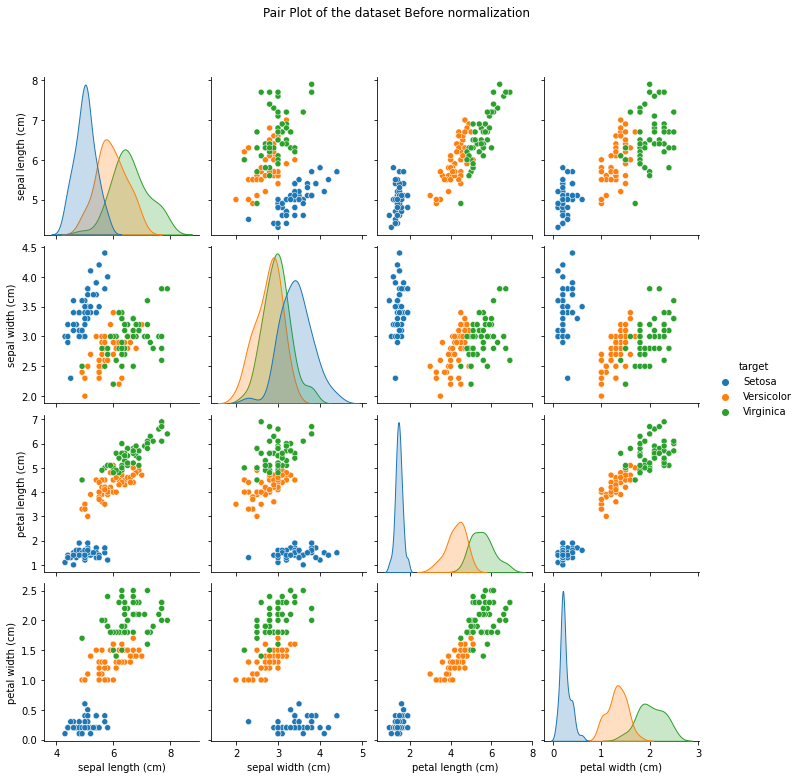

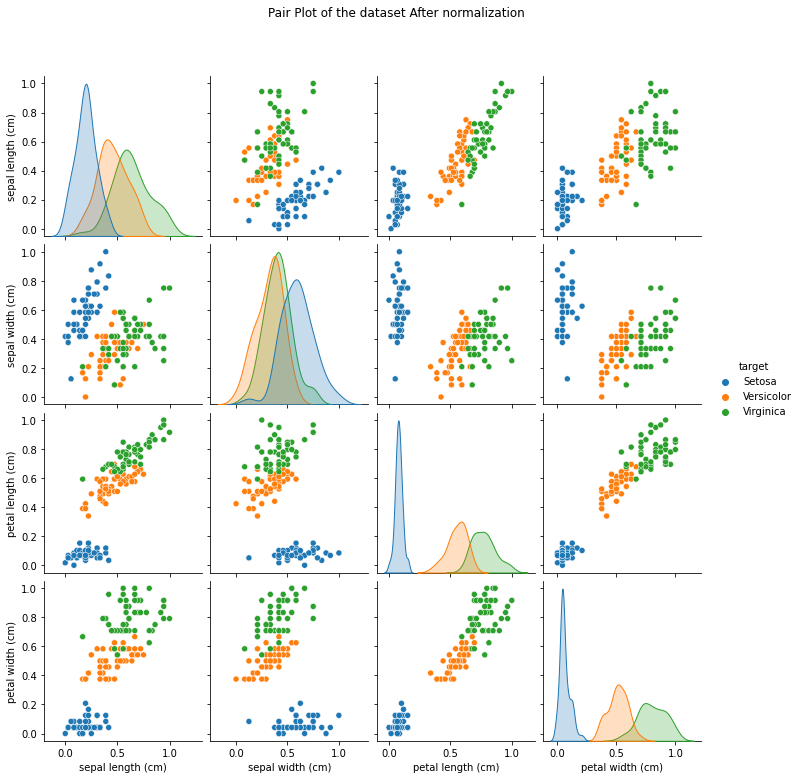

In [127]:
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before = sns.pairplot(iris.replace({'target': di}), hue='target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

after = sns.pairplot(normal_iris.replace({'target': di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)


In [128]:
# split data 
def train_test_split(data):
  N = len(data)
  train_count = int(round(len(data) * 0.75))
  test_count = N - train_count;

  random_iris = iris.sample(frac=1).reset_index(drop=True)
  target = random_iris['target'];
  random_iris.drop(['target'], axis=1)

  train = random_iris.head(train_count)
  train_target = target[:train_count]
  test = random_iris.tail(test_count)
  test_target = target[train_count:]

  return train, test, train_target, test_target

In [129]:
x = iris.iloc[:, :-1] # все параметры
y = iris.iloc[:, -1] # признак который хотим определить

x_train, x_test, y_train, y_test= train_test_split(iris)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


x_n = normal_iris.iloc[:, :-1] # все параметры
y_n = normal_iris.iloc[:, -1] # признак который хотим определить

x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(normal_iris)
x_train_n = np.asarray(x_train_n)
y_train_n = np.asarray(y_train_n)

x_test_n = np.asarray(x_test_n)
y_test_n = np.asarray(y_test_n)

In [130]:
def get_distances(x_train, x_test_point):
  distances= []
  for point in x_train:
      current_distance= 0
      for i in range(len(point)):
          current_distance += (point[i] - x_test_point[i]) **2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance)
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

def nearest_neighbors(distance_point, K):
  df_nearest= distance_point.sort_values(by=['dist'], axis=0)

  return df_nearest[:K]

def voting(df_nearest, y_train):
  counter_vote= Counter(y_train[df_nearest.index])

  y_pred= counter_vote.most_common()[0][0] 

  return y_pred


In [131]:
result=[]
K = int(round(np.sqrt(x_train.shape[0])))
for x_test_point in x_test:
  distances = get_distances(x_train, x_test_point)
  df_nearest_point= nearest_neighbors(distances, K)
  possible_y = voting(df_nearest_point, y_train)
  result.append(possible_y)

print(result)
print(y_test)

[0.0, 1.0, 1.0, 2.0, 1.0, 0.0, 2.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 2.0, 1.0, 2.0, 0.0]
[0. 1. 1. 2. 1. 0. 2. 1. 2. 1. 0. 1. 1. 0. 0. 2. 2. 2. 1. 2. 1. 2. 2. 0.
 0. 1. 0. 1. 0. 1. 2. 0. 0. 1. 2. 1. 2. 0.]


In [134]:
result=[]
K = int(round(np.sqrt(x_train_n.shape[0])))
for x_test_point in x_test_n:
  distances = get_distances(x_train_n, x_test_point)
  df_nearest_point= nearest_neighbors(distances, K)
  possible_y = voting(df_nearest_point, y_train_n)
  result.append(possible_y)

print(result)
print(y_test_n)

[2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0]
[2. 1. 1. 1. 1. 0. 2. 0. 1. 2. 0. 2. 0. 2. 0. 2. 2. 1. 2. 1. 1. 1. 0. 0.
 0. 2. 2. 2. 0. 0. 0. 1. 0. 1. 1. 1. 2. 1.]


In [140]:
# sepal_length = input("sepal length: ")
# sepal_width = input("sepal width: ")
# petal_length = input("petal length: ")
# petal_width = input("petal width: ")

point = [5.1,	3.5,	1.4,	0.2]
distance_point = get_distances(x_train, point)
df_nearest_point= nearest_neighbors(distance_point, K)
possible_y = voting(df_nearest_point, y_train)

print(possible_y)

0.0
